# Network Dynamics: Node Centrality - Lab

## Introduction
In this lab, we shall put the node centrality measures in to practice to analyze the character interactions in graph structure from the popular series of novels called ""A Song of Ice and Fire" by George R. R. Martin. The of famous HBO series "Game of Thrones" is derived from this saga. In this lab, we shall calculate different centrality measures to identify the the importance of characters as the story progresses.  


## Objectives
You will be able to:
- Understand and explain network centrality and its importance in graph analysis
- Understand and calculate Degree, Closeness, Betweenness and Eigenvector centrality measures
- Describe the use case for several centrality measures

## ASIOF (A Song of Ice and Fire) Character Interaction Graph Data

A. J. Beveridge, and J. Shan  created a network from books "A song of ice and fire" by extracting relationships between characters of the story. [The dataset is available at Github](https://github.com/mathbeveridge/asoiaf)
as an interaction network which was built as
> Parse the text and build a graph by connecting (creating an edge) two characters (nodes of the graph) whenever their names appear within 15 words. The edge weight corresponds to the number of interactions.

<img src="parse.png" width=300>

The datasets have been made available for you in the repo. You are encouraged to [visit A. J. Beveridge's blog](https://networkofthrones.wordpress.com) to see how this dataset is created, and different network analysis activities which are being performed with this dataset. The image you see below, has been created using same datasets. The blog gives you information on this and more experiments. For this lab, we shall focus more on graph analysis than visualizations.

<img src="got.png" width=800>

Let's get on with it. 

## Load necessary libraries

- Let's give you a head start by loading the libraries that you might need for this experiment. 

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

##  Load the dataset 

The dataset is available for all 5 books, with two CSV files for each book. One contains nodes data as adjacency matrix and other carries edges data as edge list, e.g. for book 1, `asoiaf-book1-edges.csv` and `asoiaf-book1-nodes.csv`. So we have 10 files in total. 

- Read edge data for all books into pandas dataframe:  book1_df .. book5_df. 

How about using a for loop to do this in one go - optional.

In [23]:
book1_df = pd.read_csv('asiof/asoiaf-book1-edges.csv')
book2_df = pd.read_csv('asiof/asoiaf-book2-edges.csv')
book3_df = pd.read_csv('asiof/asoiaf-book3-edges.csv')
book4_df = pd.read_csv('asiof/asoiaf-book4-edges.csv')
book5_df = pd.read_csv('asiof/asoiaf-book5-edges.csv')

## Create Empty graph instances for each book

In [24]:
# Create empty instances for each book above
G1 = nx.Graph()
G2 = nx.Graph()
G3 = nx.Graph()
G4 = nx.Graph()
G5 = nx.Graph()

## Create Graph
- Read the edge lists from the dataframes above into relevant graphs. 
- inspect the contents of graph to get an idea about the data structures contained within 

In [25]:
book1_df.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


In [34]:
# Read edge lists into dataframes
for row in book1_df.iterrows():
    G1.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book2_df.iterrows():
    G2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3_df.iterrows():
    G3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4_df.iterrows():
    G4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5_df.iterrows():
    G5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

## Finding important nodes (characters) 

Let's use and compare different centralities measures we saw earlier to identify importance of nodes in this network. There is no one right way of calaculating it, every approach has a different meaning.

## Calculate Degree Centrality 
Degree centrality which is defined by degree of a node (number of neighbors) divided by a noramlizing factor n-1 where n is the number of nodes.

- __Find the neighbours of '**Catelyn-Stark**' from book 1.__

In [42]:
# Neighbors for catelyn stark
list(G1.neighbors('Catelyn-Stark'))

['Arya-Stark',
 'Bran-Stark',
 'Bronn',
 'Brynden-Tully',
 'Cersei-Lannister',
 'Colemon',
 'Donnel-Waynwood',
 'Eddard-Stark',
 'Edmure-Tully',
 'Eon-Hunter',
 'Hallis-Mollen',
 'Hoster-Tully',
 'Jaime-Lannister',
 'Joffrey-Baratheon',
 'Jon-Arryn',
 'Jon-Snow',
 'Jon-Umber-(Greatjon)',
 'Luwin',
 'Lysa-Arryn',
 'Marillion',
 'Masha-Heddle',
 'Moreo-Tumitis',
 'Mya-Stone',
 'Mychel-Redfort',
 'Nestor-Royce',
 'Petyr-Baelish',
 'Rickard-Karstark',
 'Rickon-Stark',
 'Robb-Stark',
 'Robert-Arryn',
 'Robert-Baratheon',
 'Rodrik-Cassel',
 'Sansa-Stark',
 'Stevron-Frey',
 'Theon-Greyjoy',
 'Tyrion-Lannister',
 'Tytos-Blackwood',
 'Tywin-Lannister',
 'Vardis-Egen',
 'Varys',
 'Walder-Frey',
 'Wendel-Manderly',
 'Willis-Wode']

 `nx.degree_centrality(graph)` returns a dictionary where keys are the nodes and values are the corresponding degree centrality. 
 
- __Find the five most and least important characters from book 1 according to degree centrality__

In [48]:
# Five most important characters from book 1 according to degree centrality
sorted(nx.degree_centrality(G1).items(), key=lambda x: x[1], reverse=True)[0:5]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572)]

In [49]:
# Five least important characters from book 1 according to degree centrality
sorted(nx.degree_centrality(G1).items(), key=lambda x: x[1])[0:5]

[('Clydas', 0.005376344086021506),
 ('Arthur-Dayne', 0.005376344086021506),
 ('Arys-Oakheart', 0.005376344086021506),
 ('Mance-Rayder', 0.005376344086021506),
 ('Thoros-of-Myr', 0.005376344086021506)]

- __Plot and explain histogram from degree centrality values, calculated from book 1, and comment on the output__

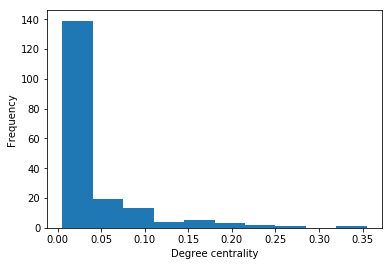

In [61]:
plt.hist(nx.degree_centrality(G1).values())
plt.xlabel('Degree centrality')
plt.ylabel('Frequency');

In [13]:
# Your observations here 
# Most characters are only connected to a small number of other characters, while a very small
# number of characters are connected to a lot of other characters.

##  Weighted Degree Centrality

- Create a new centrality measure as a function, `weighted_degree_centrality(Graph)` which takes in Graph and the returns a weighted degree centrality dictionary. 

[Refer to this paper to get an insight into this approach](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0165781)

Weighted degree is calculated by:

1) __Sum the weight of the all edges of a node__

2) __Normalize the weighted degree by the total weight of the graph i.e. sum of weighted degrees of all nodes__  

3) __Calculated weighted degree centrality for book 1 using this function__

In [106]:
# From solution
def weighted_degree_centrality(G):
    result = dict()
    total = 0
    for node in G.nodes():
        weight_degree = 0
        for n in G.edges([node], data=True):
            weight_degree += n[2]['weight']
        result[node] = weight_degree
        total += weight_degree
    for node, value in result.items():
        result[node] = value/total
    return result

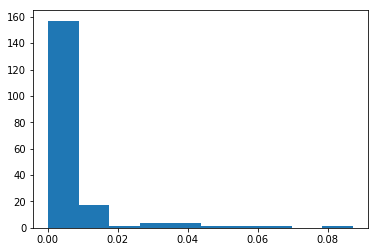

In [107]:
# Uncomment below to run


plt.hist(list(weighted_degree_centrality(G1).values()))
plt.show()

- __Get the top 10 characters from book 1, based on weighted degree centrality and compare with the results of simple degree centrality. Record your observations below__

In [109]:
# Weighted DC
sorted(weighted_degree_centrality(G1).items(), key=lambda x: x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.08715720879717621),
 ('Robert-Baratheon', 0.06387455878360032),
 ('Jon-Snow', 0.05321748574531632),
 ('Tyrion-Lannister', 0.044121639967417865),
 ('Sansa-Stark', 0.03699429812652729),
 ('Bran-Stark', 0.03604398588107521),
 ('Catelyn-Stark', 0.03529731197393429),
 ('Robb-Stark', 0.03502579418951941),
 ('Daenerys-Targaryen', 0.030070594623947868),
 ('Arya-Stark', 0.02918816182459951)]

In [110]:
# Un-weighted DC
sorted(nx.degree_centrality(G1).items(), key=lambda x: x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.3548387096774194),
 ('Robert-Baratheon', 0.2688172043010753),
 ('Tyrion-Lannister', 0.24731182795698928),
 ('Catelyn-Stark', 0.23118279569892475),
 ('Jon-Snow', 0.19892473118279572),
 ('Robb-Stark', 0.18817204301075272),
 ('Sansa-Stark', 0.18817204301075272),
 ('Bran-Stark', 0.17204301075268819),
 ('Cersei-Lannister', 0.16129032258064518),
 ('Joffrey-Baratheon', 0.16129032258064518)]

In [18]:
# Your observations here 
# In the weighted DC, Jon and Robb are higher and Catelyn is lower, and Daenerys and Arya are on
# the list but Joffrey and Cersei are not. This is because Daenerys and Arya must have fewer
# connections but ones with stronger weights, i.e. the connections are stronger. Whereas Joffrey
# and Cersei have more but weaker connections.

- __ Confirm that sum of weighted degree centralitity value for all nodes sum up to 1 i.e. normalization__

In [111]:
# Uncomment to run 

sum(list(weighted_degree_centrality(G1).values()))

1.0000000000000002

## Betweenness centrality 

- __Calculate the weighted and un-weighted "Betweenness" centrality for book 1, and compare top ten characters as above__
- __Comment on the results__

In [117]:
# Unweighted Betweenness Centrality
sorted(nx.betweenness_centrality(G1).items(), key=lambda x: x[1], reverse=True)[0:10]

[('Eddard-Stark', 0.2696038913836117),
 ('Robert-Baratheon', 0.21403028397371796),
 ('Tyrion-Lannister', 0.1902124972697492),
 ('Jon-Snow', 0.17158135899829566),
 ('Catelyn-Stark', 0.1513952715347627),
 ('Daenerys-Targaryen', 0.08627015537511595),
 ('Robb-Stark', 0.07298399629664767),
 ('Drogo', 0.06481224290874964),
 ('Bran-Stark', 0.05579958811784442),
 ('Sansa-Stark', 0.03714483664326785)]

In [119]:
# Weighted Betweenness similarity 
sorted(nx.betweenness_centrality(G1, weight='weight').items(), key=lambda x: x[1], reverse=True)[0:10]

[('Robert-Baratheon', 0.23341885664466297),
 ('Eddard-Stark', 0.18703429235687297),
 ('Tyrion-Lannister', 0.15311225972516293),
 ('Robb-Stark', 0.1024018949825402),
 ('Catelyn-Stark', 0.10169012330302643),
 ('Jon-Snow', 0.09027684366394043),
 ('Jaime-Lannister', 0.07745109164464009),
 ('Rodrik-Cassel', 0.07667992877670296),
 ('Drogo', 0.06894355184677767),
 ('Jorah-Mormont', 0.0627085149665795)]

In [120]:
# Your observations here
# When nodes are weighted by betweenness centrality, Robert Baratheon becomes the most important
# character, presumably because he is a strong link between other characters he is strongly
# linked to.

## Is there a correlation between node centrality measures?

Well, lets find out. 


- __Find the correlation between following:__
    - Weighted Degree 
    - Closeness
    - Weighted Betweenness
    - Weighted Eigenvector
- __Use book 1 for the analysis (You may choose other books as well)__
- __Calculate correlation matrix and visualize the results for all characters__
- __Comment on the results__

In [136]:
# Create a dataframe with 4 centrality measures, for all characters
corr = pd.DataFrame([weighted_degree_centrality(G1),
                    nx.closeness_centrality(G1),
                    nx.betweenness_centrality(G1, weight='weight'),
                    nx.eigenvector_centrality_numpy(G1, weight='weight')])
corr = corr.T
corr.columns = ['Degree', 'Closeness', 'Betweenness', 'Eigenvector']

In [137]:
corr.head()

,Degree,Closeness,Betweenness,Eigenvector
Addam-Marbrand,0.000611,0.323478,0.000000,0.001551
Aegon-I-Targaryen,0.000611,0.376518,0.000000,0.005096
Aemon-Targaryen-(Maester-Aemon),0.005023,0.336957,0.010753,0.013992
Aerys-II-Targaryen,0.002512,0.385892,0.007183,0.027406
Aggo,0.002444,0.292913,0.000450,0.000852


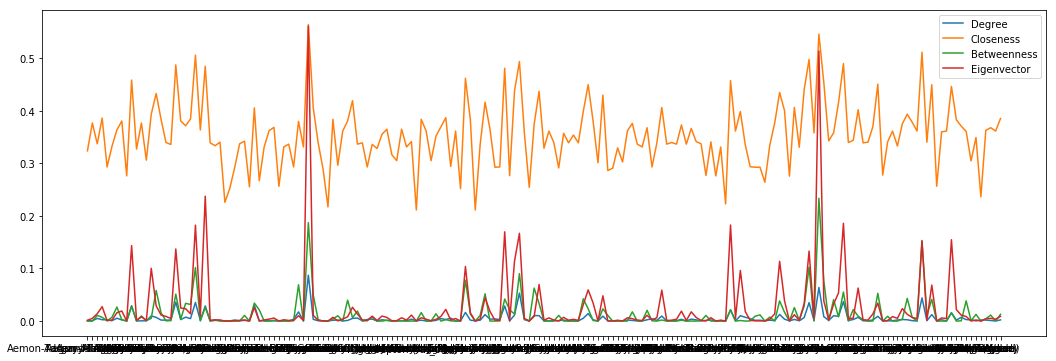

In [146]:
plt.figure(figsize=(18,6))
plt.plot(corr)
plt.legend(list(corr.columns))
plt.show()

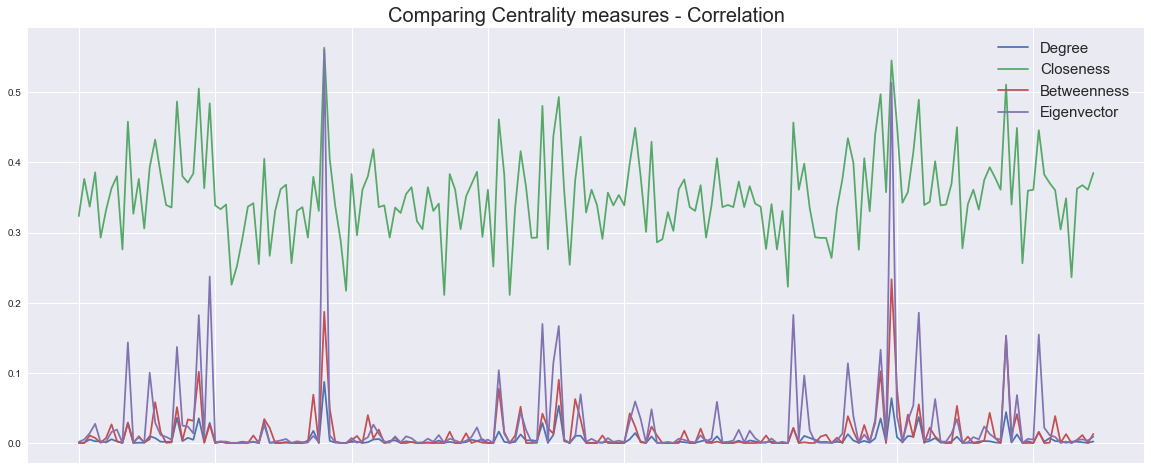

In [24]:
# plot the measures as lines to see if they correlate


In [147]:
# calculate Correlation matrix
corr.corr()

,Degree,Closeness,Betweenness,Eigenvector
Degree,1.000000,0.713617,0.857222,0.922521
Closeness,0.713617,1.000000,0.675276,0.697499
Betweenness,0.857222,0.675276,1.000000,0.805316
Eigenvector,0.922521,0.697499,0.805316,1.000000


In [26]:
# Your observations here 
# Degree and Eigenvector are closely correlated, but others are less correlated. Closeness is
# particularly poorly correlated to other measures.

## Character Evolution : Bring the the rest of series 

By Studying the change in centrality throughout the series, we can create an evolution of characters as the story progresses. 

- __Calculate the weighted degree centrality for all five books (edge lists), and save your results in a dataframe__

Hint: Fill nans with zero for values that can not be calculated  due to being extremely small

In [150]:
char_centrality = [weighted_degree_centrality(G) for G in [G1, G2, G3, G3, G5]]
char_centrality = pd.DataFrame(char_centrality)

In [156]:
char_centrality.fillna(0, inplace=True)

In [157]:
char_centrality.head()

,Addam-Marbrand,Aegon-Frey-(son-of-Stevron),Aegon-I-Targaryen,Aegon-Targaryen-(son-of-Rhaegar),Aegon-V-Targaryen,Aemon-Targaryen-(Dragonknight),Aemon-Targaryen-(Maester-Aemon),Aenys-Frey,Aeron-Greyjoy,Aerys-I-Targaryen,...,Yandry,Yellow-Dick,Yezzan-zo-Qaggaz,Ygritte,Yohn-Royce,Yoren,Ysilla,Yurkhaz-zo-Yunzak,Zei,Zollo
0,0.000611,0.000000,0.000611,0.000000,0.000000,0.000000,0.005023,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00224,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.000000,0.001336,0.000000,0.000236,0.000000,0.002673,0.000472,0.001730,0.000236,...,0.000000,0.000000,0.000000,0.001887,0.000000,0.00684,0.000000,0.00000,0.000000,0.000000
2,0.001711,0.001062,0.000649,0.000177,0.000000,0.000177,0.009083,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007314,0.000177,0.00000,0.000000,0.00000,0.000177,0.000472
3,0.001711,0.001062,0.000649,0.000177,0.000000,0.000177,0.009083,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.007314,0.000177,0.00000,0.000000,0.00000,0.000177,0.000472
4,0.000000,0.000000,0.000350,0.011386,0.000000,0.000000,0.003591,0.001139,0.000613,0.000000,...,0.005693,0.001314,0.004204,0.001489,0.000000,0.00000,0.004029,0.00035,0.000000,0.000000


- __Identify top 10 characters i.e. having 10 highest degree centrality values, from `evol_degree_df` and create a new dataframe with their names and centrality value__

In [164]:
char_total_centrality = pd.DataFrame(char_centrality.max(axis=0))
char_total_centrality.columns = ['Centrality']

In [168]:
char_total_centrality.sort_values('Centrality', ascending=False)[0:10]

,Centrality
Eddard-Stark,0.087157
Jon-Snow,0.066649
Tyrion-Lannister,0.065173
Robert-Baratheon,0.063875
Daenerys-Targaryen,0.063146
Joffrey-Baratheon,0.049450
Cersei-Lannister,0.040487
Bran-Stark,0.038208
Sansa-Stark,0.036994
Stannis-Baratheon,0.036784


- __Plot the evolution of weighted degree centrality of the above characters over the 5 books__
- __Comment on your answer__

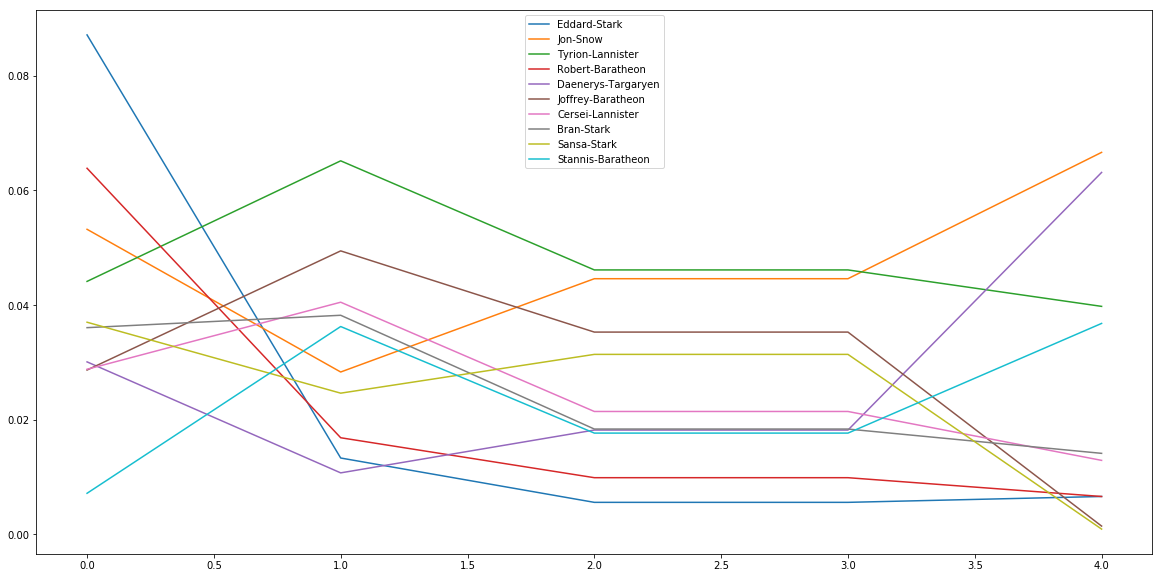

In [180]:
char_centrality[list(pd.DataFrame.from_records(char_centrality).max(axis=0).sort_values(ascending=False)[0:10].index)].plot(figsize=(20,10))
plt.show()

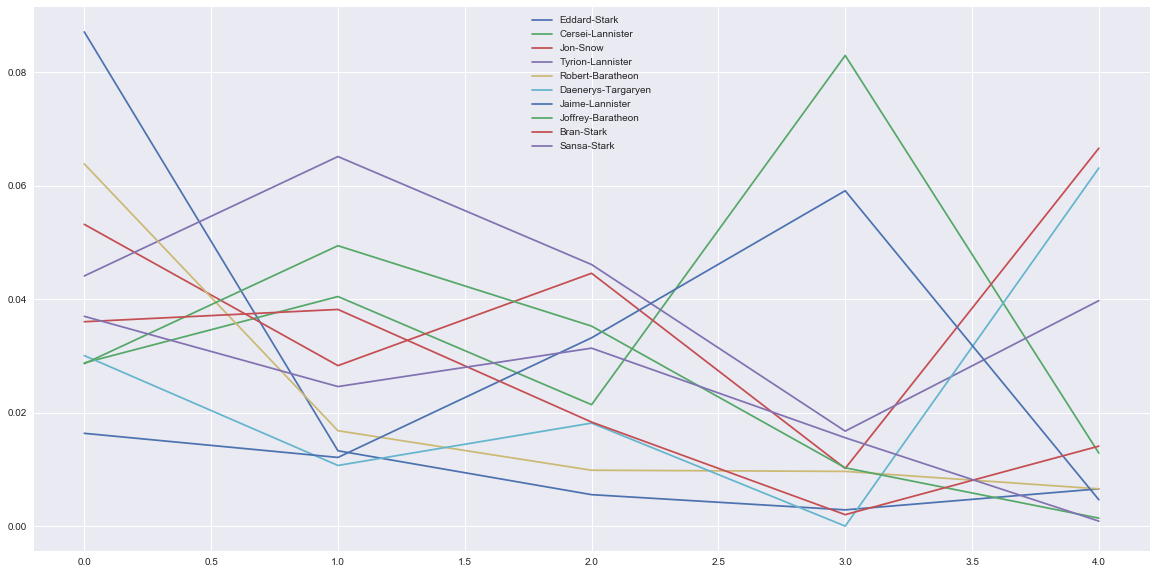

In [182]:
# Your observations here 



#### Repeat Above for Weighted Betweenness Centrality

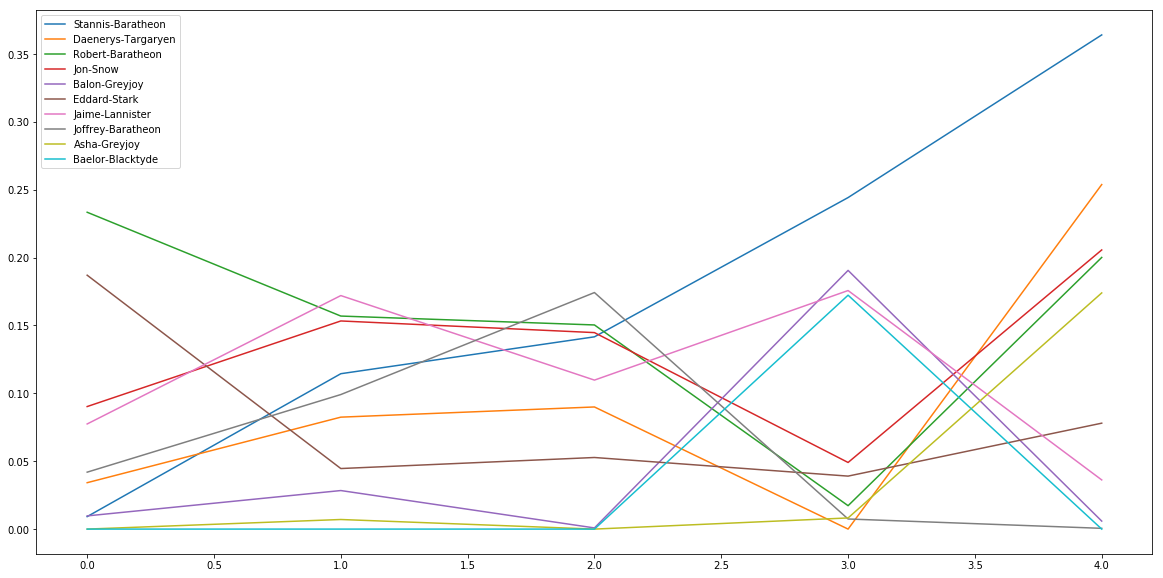

In [183]:
# From solutions
evol_betweenness = [nx.betweenness_centrality(graph, weight='weight') for graph in [G1, G2, G3, G4, G5]]
evol_betweenness_df = pd.DataFrame.from_records(evol_betweenness).fillna(0)
evol_betweenness_df[list(pd.DataFrame.from_records(evol_betweenness_df).max(axis=0).sort_values(ascending=False)[0:10].index)].plot(figsize=(20,10))
plt.show()

In [32]:
# Record Your observations here 

## Level Up: Visualize the Graphs (optional)

- Use the techniques seen so far to visualize and customize the graphs 
- Study the shapes of the graphs in terms of spread , clusters etc and see if you can identify any links to the actual books (or the TV series)

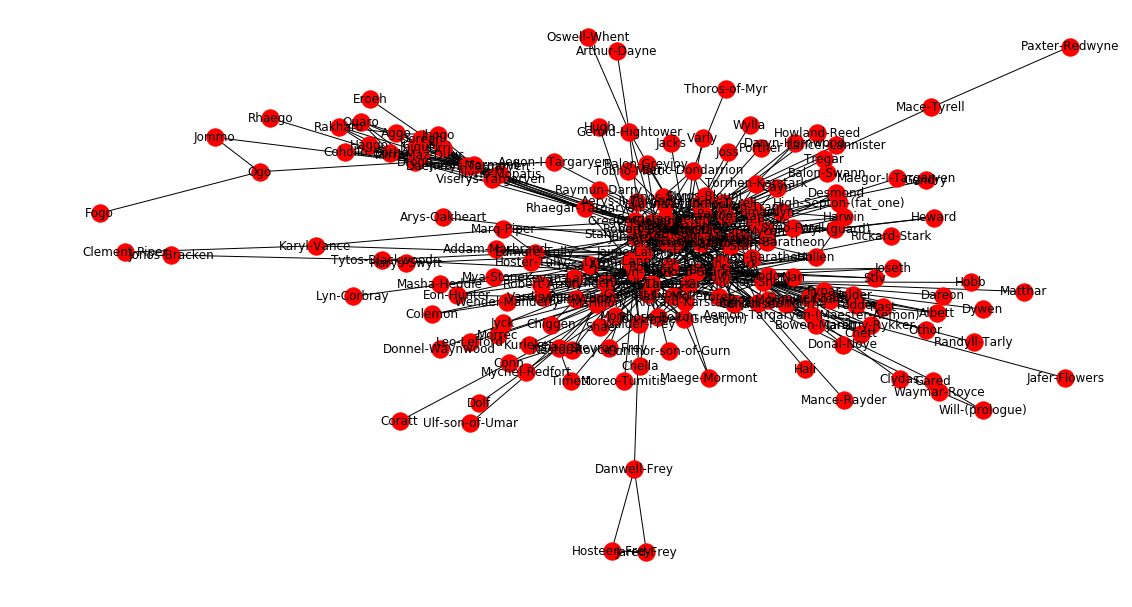

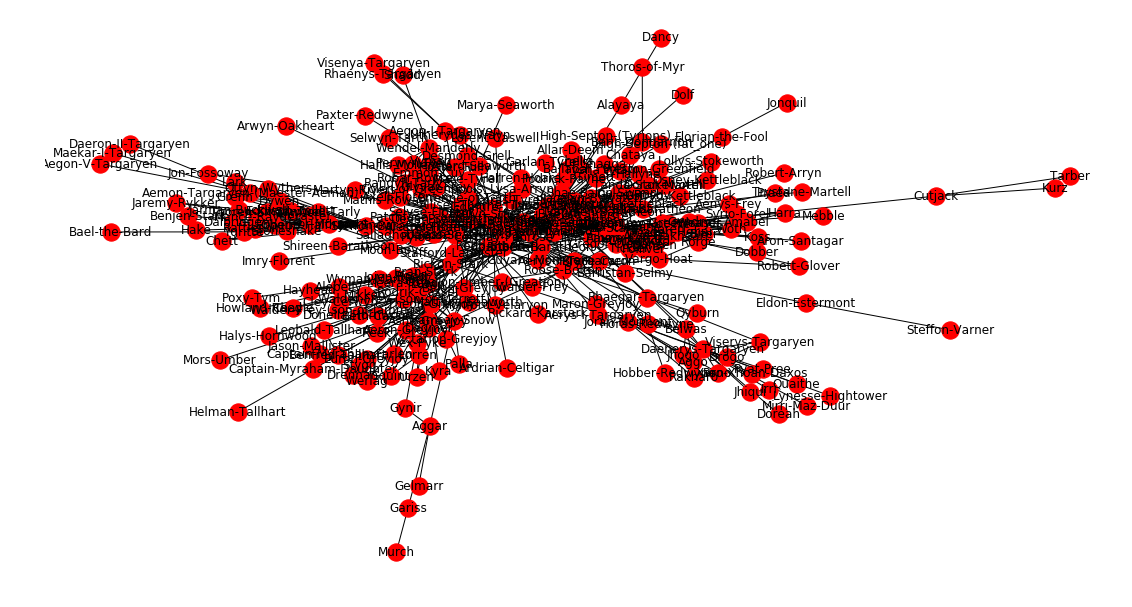

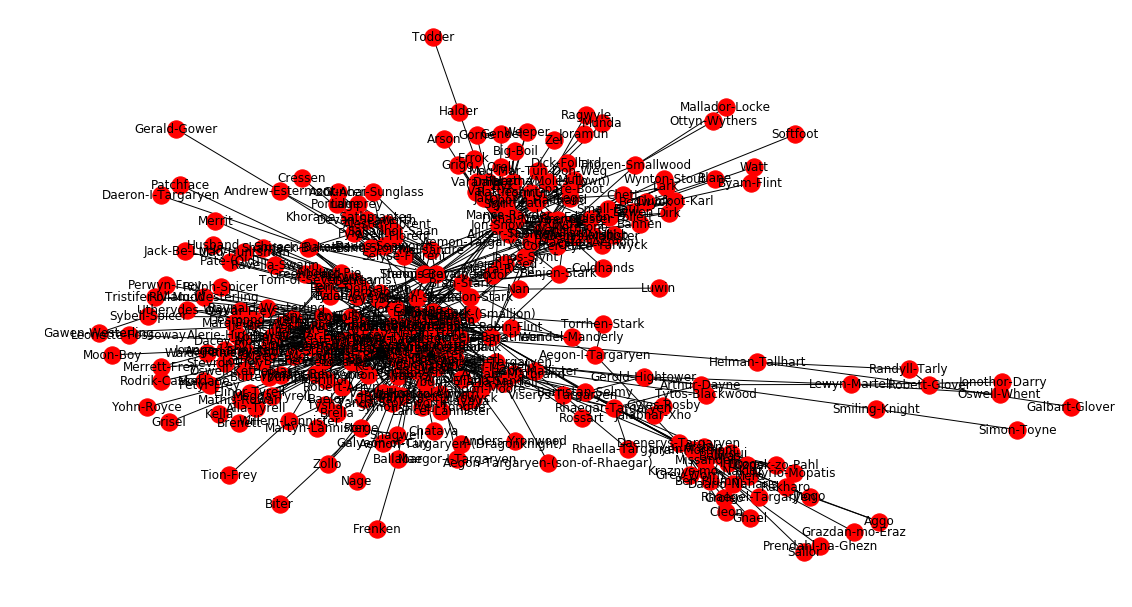

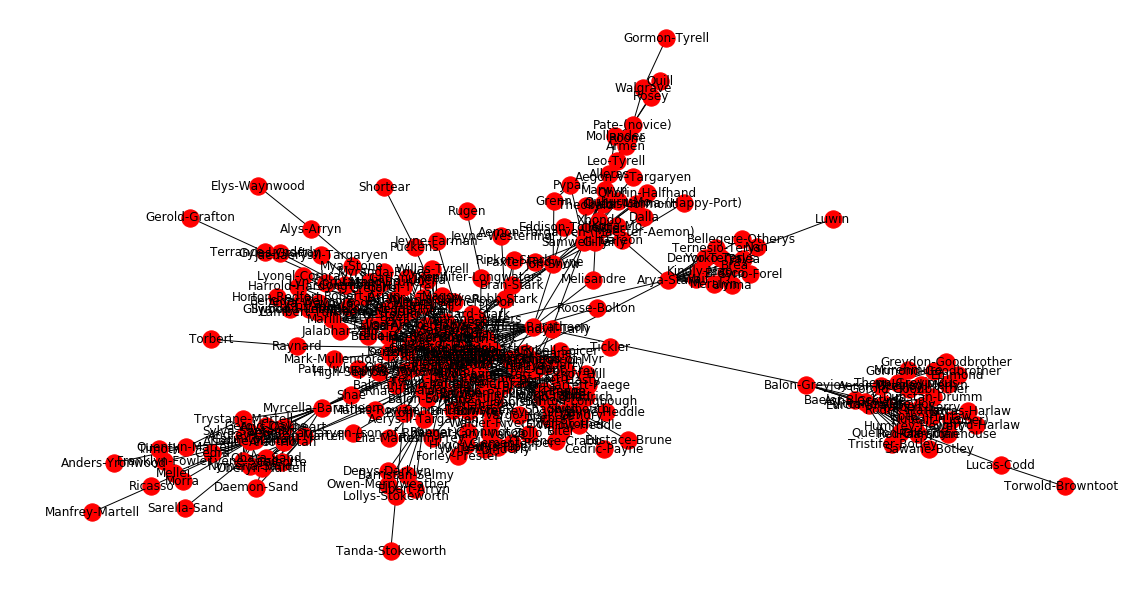

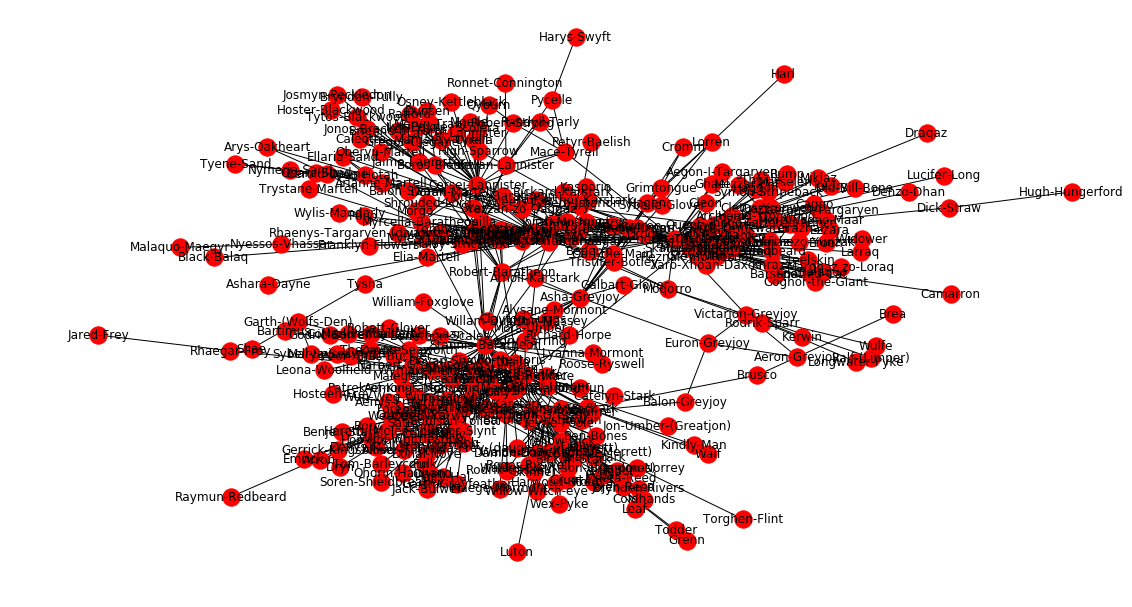

In [186]:
for g in [G1,G2,G3,G4,G5]:
    plt.figure(figsize=(15,8))
    nx.draw(g, with_labels=True)

## Summary 

In this lab, we looked at different centrality measures of the graph data for the ASIOF dataset. We also compared these measures to see how they correlate with each other. We also saw in practice, the difference between taking the weighted centrality measures and how it may effect the results. 